In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [5]:
listing = pd.read_csv("C:/Users/Super User/Desktop/Sem2 courses/CZ1015/listings.csv")

In [6]:
reviews = pd.read_csv("C:/Users/Super User/Desktop/Sem2 courses/CZ1015/reviews.csv")

### Sentiment Analysis

In [7]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [8]:
reviews['comments'] = '"' + reviews['comments'].astype(str) + '"'

In [9]:
sentences = pd.DataFrame(reviews['comments'])
sentences_ar = sentences.to_numpy()

In [10]:
scores =[]

for sentence in sentences_ar:
    score = analyser.polarity_scores(sentence)
    scores.append(score)


In [22]:
listing = listing[listing['review_scores_rating'].isnull()==False]
listing=listing.reset_index(drop=True)
listing

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,analyser_review_rating
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,94.72
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,94.88
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,94.60
3,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,92.10
4,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,f,NaN,WASHINGTON,f,strict,f,f,1,2.45,97.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,262764,https://www.airbnb.com/rooms/262764,20160104002432,2016-01-04,Fremont Farmhouse,Our 2BR/1 bath home in Fremont's most fun neig...,"1200 ft2 2BR, 1 Bath farmhouse with a large, t...",Our 2BR/1 bath home in Fremont's most fun neig...,none,We love that Fremont is so centrally located t...,...,f,NaN,WASHINGTON,f,strict,f,f,1,1.56,97.00
3167,8578490,https://www.airbnb.com/rooms/8578490,20160104002432,2016-01-04,Super Convenient Top Floor Apt,In the true spirit of AirBNB this unit is avai...,The building is older (1970's) so not the mode...,In the true spirit of AirBNB this unit is avai...,none,I am equidistant to Fremont and Wallingford an...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,0.63,83.95
3168,3383329,https://www.airbnb.com/rooms/3383329,20160104002432,2016-01-04,OF THE TREE & CLOUDS. KID FRIENDLY!,"Of the Tree & Clouds' ""Roots"" apartment is 8 b...","The 1-bedroom, ground-floor Roots apartment is...","Of the Tree & Clouds' ""Roots"" apartment is 8 b...",none,It's taken me a while to figure out why Fremon...,...,f,NaN,WASHINGTON,t,moderate,t,t,3,4.01,95.89
3169,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,f,NaN,WASHINGTON,f,strict,f,f,8,0.30,50.00


In [17]:
scores_df = pd.DataFrame(scores)
reviews['score']=scores_df['compound']
reviews['score']

0        0.7901
1        0.9875
2        0.8718
3        0.8313
4        0.9783
          ...  
84844    0.9498
84845    0.8658
84846    0.0000
84847    0.7233
84848    0.9801
Name: score, Length: 84849, dtype: float64

In [18]:
analyser_review = []
for index, row in listing.iterrows():
    review = reviews['score'][reviews['listing_id'] == row['id']]
    analyser_review.append(review.mean())

In [19]:
analyser_review_rating=pd.DataFrame(analyser_review)
analyser_review_rating

,0
0,0.894372
1,0.897614
2,0.891900
3,0.842034
4,0.950865
...,...
3166,0.940060
3167,0.679000
3168,0.917823
3169,0.000000


In [20]:
y=analyser_review_rating
y=((y+1)/2)*100
y=y.round(2)
y

,0
0,94.72
1,94.88
2,94.60
3,92.10
4,97.54
...,...
3166,97.00
3167,83.95
3168,95.89
3169,50.00


In [21]:
listing['analyser_review_rating']=y
listing['analyser_review_rating']

0       94.72
1       94.88
2       94.60
3       92.10
4       97.54
        ...  
3166    97.00
3167    83.95
3168    95.89
3169    50.00
3170    98.02
Name: analyser_review_rating, Length: 3171, dtype: float64

### Linear Regression

#### Predictors : review_scores_communication, review_scores_cleanliness, review_scores_checkin, review_scores_location

#### With analyser_review_rating

In [40]:
copy = listing
copy=copy[copy['number_of_reviews']>10]
copy=copy.reset_index(drop=True)
copy['analyser_review_rating']

0       94.72
1       94.88
2       94.60
3       92.10
4       97.54
        ...  
1764    95.30
1765    98.20
1766    94.66
1767    93.93
1768    95.89
Name: analyser_review_rating, Length: 1769, dtype: float64

In [41]:
y = copy['analyser_review_rating']
X = pd.DataFrame(copy[[ "review_scores_communication", "review_scores_cleanliness", "review_scores_checkin", "review_scores_location"]])
X = pd.concat([X,y],axis=1)
X=X.dropna(axis=0, how='any')
X=X.reset_index(drop=True)
y=X['analyser_review_rating']
X=X.drop(['analyser_review_rating'],axis=1)
y


0       94.72
1       94.88
2       94.60
3       92.10
4       97.54
        ...  
1764    95.30
1765    98.20
1766    94.66
1767    93.93
1768    95.89
Name: analyser_review_rating, Length: 1769, dtype: float64

Intercept of Regression 	: b =  44.57821027964418
Coefficients of Regression 	: a =  [1.46942196 1.54812178 1.41802366 0.6509268 ]



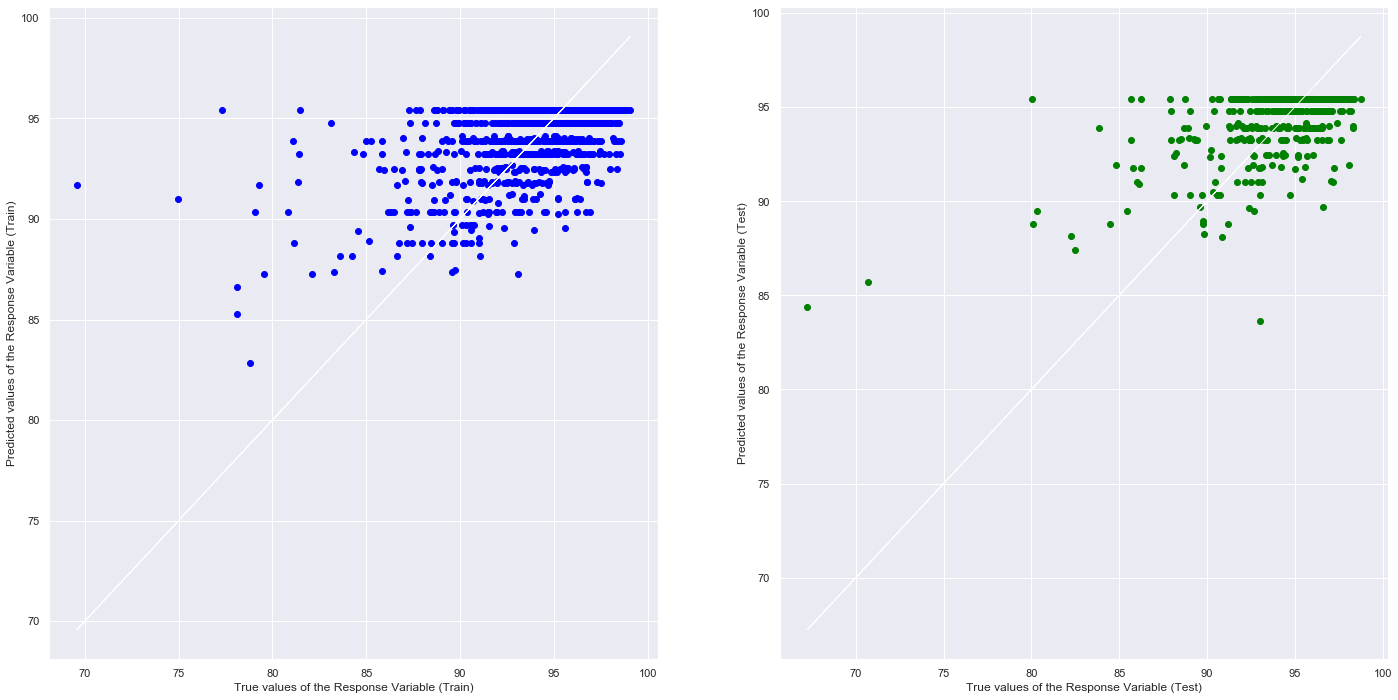

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2874346630348529
Mean Squared Error (MSE) 	: 7.375342254493335
Mean Absolute Error (MAE) 	: 1.9504092967288122

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3323543755072893
Mean Squared Error (MSE) 	: 8.146645344562492
Mean Absolute Error (MAE) 	: 2.0115074737741954



In [42]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
#print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
#print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_test, y_test_pred))
print()

#### With review_scores_rating

In [43]:
y = copy['review_scores_rating']
X = pd.DataFrame(copy[[ "review_scores_communication", "review_scores_cleanliness", "review_scores_checkin", "review_scores_location"]])
X = pd.concat([X,y],axis=1)
X=X.dropna(axis=0, how='any')
X=X.reset_index(drop=True)
y=X['review_scores_rating']
X=X.drop(['review_scores_rating'],axis=1)
y


0        95.0
1        96.0
2        97.0
3        92.0
4        95.0
        ...  
1764     98.0
1765    100.0
1766     95.0
1767     96.0
1768     96.0
Name: review_scores_rating, Length: 1769, dtype: float64

Intercept of Regression 	: b =  4.009763632466374
Coefficients of Regression 	: a =  [2.79705082 3.10976627 2.05430738 1.36677399]



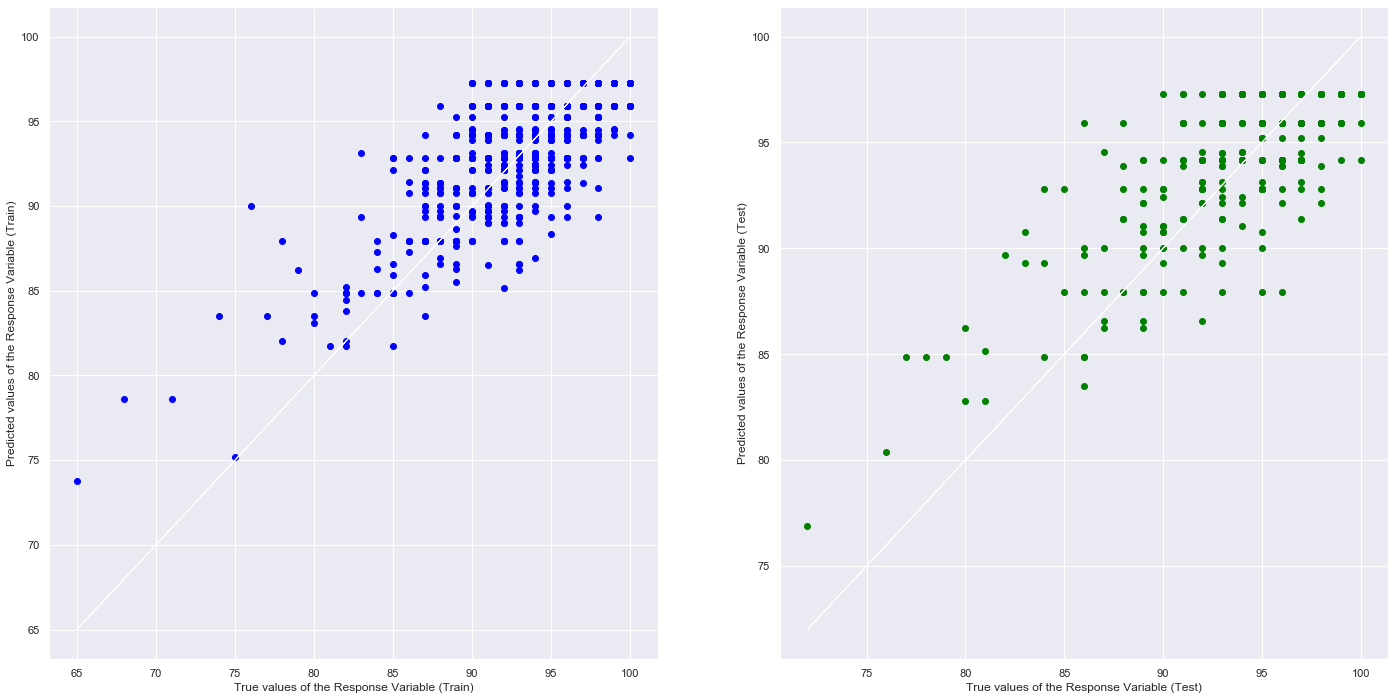

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6431981491887836
Mean Squared Error (MSE) 	: 5.860225608612724
Mean Absolute Error (MAE) 	: 1.8378545097039796

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6415372134184609
Mean Squared Error (MSE) 	: 6.745491195317642
Mean Absolute Error (MAE) 	: 1.972997446195667



In [44]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
#print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
#print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE) \t:", mean_absolute_error(y_test, y_test_pred))
print()

### Decison Tree Regressor

#### With analyser_review_rating

In [45]:
review_cat = []
y=listing['analyser_review_rating']
for item,row in listing.iterrows():
    if (row['analyser_review_rating']<=100 and row['analyser_review_rating']>=95):
        review_cat.append(9)
    if (row['analyser_review_rating']<95 and row['analyser_review_rating']>=90):
        review_cat.append(9)
    if (row['analyser_review_rating']<90 and row['analyser_review_rating']>=80):
        review_cat.append(8)
    if (row['analyser_review_rating']<80 and row['analyser_review_rating']>=70):
        review_cat.append(7)
    if (row['analyser_review_rating']<70 and row['analyser_review_rating']>=60):
        review_cat.append(6)
    if (row['analyser_review_rating']<60 and row['analyser_review_rating']>=50):
        review_cat.append(5)
    if (row['analyser_review_rating']<50 and row['analyser_review_rating']>=40):
        review_cat.append(4)
    if (row['analyser_review_rating']<40 and row['analyser_review_rating']>=30):
        review_cat.append(3)
    if (row['analyser_review_rating']<30 and row['analyser_review_rating']>=20):
        review_cat.append(2)
    if (row['analyser_review_rating']<20 and row['analyser_review_rating']>=10):
        review_cat.append(1)
    if (row['analyser_review_rating']<10 and row['analyser_review_rating']>=0):
        review_cat.append(0)

In [46]:
review_cat=pd.DataFrame(review_cat)
review_cat

,0
0,9
1,9
2,9
3,9
4,9
...,...
3166,9
3167,8
3168,9
3169,5


In [47]:
listing['review_cat']=review_cat
listing['review_cat']

0       9
1       9
2       9
3       9
4       9
       ..
3166    9
3167    8
3168    9
3169    5
3170    9
Name: review_cat, Length: 3171, dtype: int64

In [96]:
copy = listing
copy=copy[copy['number_of_reviews']>10]
copy=copy.reset_index(drop=True)
copy['review_cat']

0       9
1       9
2       9
3       9
4       9
       ..
1764    9
1765    9
1766    9
1767    9
1768    9
Name: review_cat, Length: 1769, dtype: int64

In [97]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = pd.DataFrame(copy[["review_scores_communication", "review_scores_cleanliness", "review_scores_checkin", "review_scores_location",'review_cat']])
X=X.dropna(axis=0, how='any')
X=X.reset_index(drop=True)
y=pd.DataFrame(X['review_cat'].astype('category'))
X=X.drop(['review_cat'],axis=1)
X

,review_scores_communication,review_scores_cleanliness,review_scores_checkin,review_scores_location
0,10.0,10.0,10.0,9.0
1,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0
3,10.0,9.0,10.0,9.0
4,10.0,10.0,10.0,10.0
...,...,...,...,...
1764,10.0,10.0,10.0,10.0
1765,10.0,10.0,10.0,10.0
1766,10.0,10.0,10.0,10.0
1767,10.0,9.0,10.0,10.0


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [100]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.918552036199095

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.909706546275395



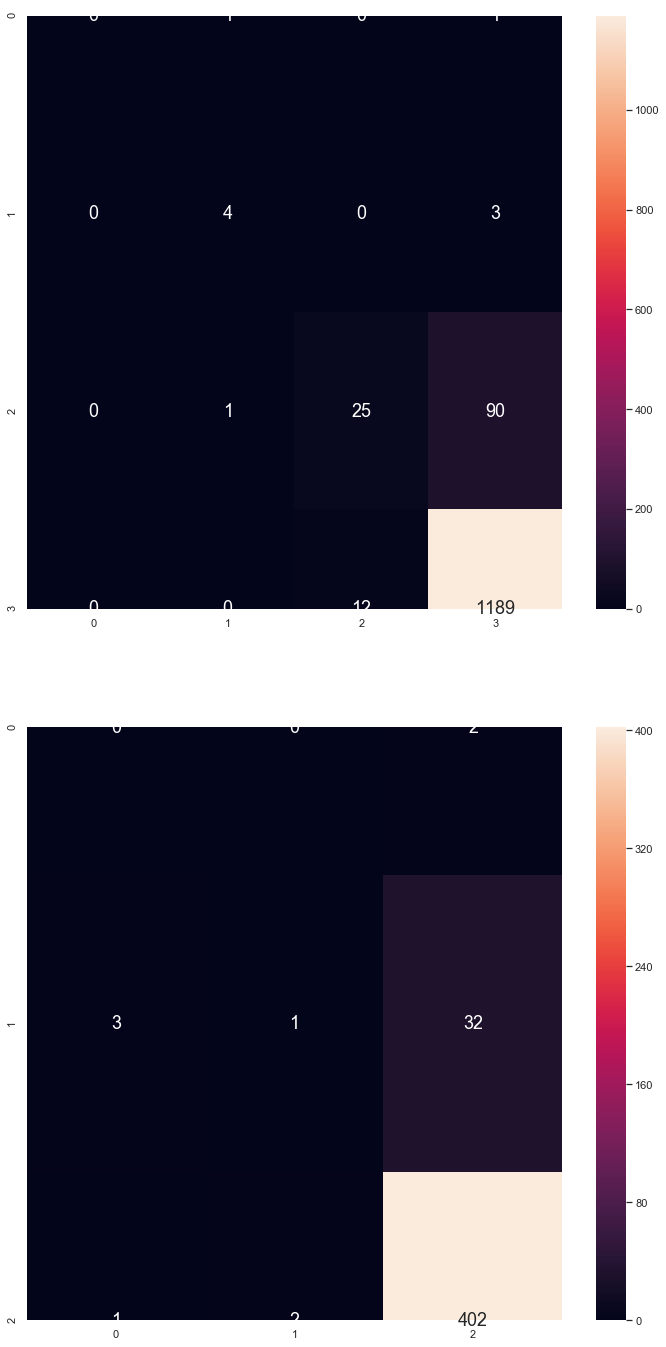

In [101]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Logistic Regression

#### With analyser_review_rating

In [102]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=1000)
logmodel.fit(X_train, y_train)

C:\Users\Super User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
#predictions
Predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           7       0.00      0.00      0.00         2
           8       0.56      0.14      0.22        36
           9       0.93      0.99      0.96       405

    accuracy                           0.92       443
   macro avg       0.49      0.38      0.39       443
weighted avg       0.89      0.92      0.89       443



C:\Users\Super User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Predictions)
cnf_matrix

array([[  0,   1,   1],
       [  0,   5,  31],
       [  0,   3, 402]], dtype=int64)

### Decision Tree regressor

#### With review_scores_rating

In [105]:
review_cat = []
listing = listing.reset_index(drop=True)
for item,row in listing.iterrows():
    if (row['review_scores_rating']<=100 and row['review_scores_rating']>=95):
        review_cat.append(9)
    if (row['review_scores_rating']<95 and row['review_scores_rating']>=90):
        review_cat.append(9)
    if (row['review_scores_rating']<90 and row['review_scores_rating']>=80):
        review_cat.append(8)
    if (row['review_scores_rating']<80 and row['review_scores_rating']>=70):
        review_cat.append(7)
    if (row['review_scores_rating']<70 and row['review_scores_rating']>=60):
        review_cat.append(6)
    if (row['review_scores_rating']<60 and row['review_scores_rating']>=50):
        review_cat.append(5)
    if (row['review_scores_rating']<50 and row['review_scores_rating']>=40):
        review_cat.append(4)
    if (row['review_scores_rating']<40 and row['review_scores_rating']>=30):
        review_cat.append(3)
    if (row['review_scores_rating']<30 and row['review_scores_rating']>=20):
        review_cat.append(2)
    if (row['review_scores_rating']<20 and row['review_scores_rating']>=10):
        review_cat.append(1)
    if (row['review_scores_rating']<10 and row['review_scores_rating']>=0):
        review_cat.append(0)

In [106]:
review_cat=pd.DataFrame(review_cat)
review_cat

,0
0,9
1,9
2,9
3,9
4,9
...,...
3166,9
3167,9
3168,9
3169,8


In [112]:
copy = listing
copy=copy[copy['number_of_reviews']>10]
copy=copy.reset_index(drop=True)
copy['review_cat']

0       9
1       9
2       9
3       9
4       9
       ..
1764    9
1765    9
1766    9
1767    9
1768    9
Name: review_cat, Length: 1769, dtype: int64

In [113]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = pd.DataFrame(copy[["review_scores_communication", "review_scores_cleanliness", "review_scores_checkin", "review_scores_location",'review_cat']])
X=X.dropna(axis=0, how='any')
X=X.reset_index(drop=True)
y=pd.DataFrame(X['review_cat'].astype('category'))
X=X.drop(['review_cat'],axis=1)
X

,review_scores_communication,review_scores_cleanliness,review_scores_checkin,review_scores_location
0,10.0,10.0,10.0,9.0
1,10.0,10.0,10.0,10.0
2,10.0,10.0,10.0,10.0
3,10.0,9.0,10.0,9.0
4,10.0,10.0,10.0,10.0
...,...,...,...,...
1764,10.0,10.0,10.0,10.0
1765,10.0,10.0,10.0,10.0
1766,10.0,10.0,10.0,10.0
1767,10.0,9.0,10.0,10.0


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [115]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9193061840120663

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9142212189616253



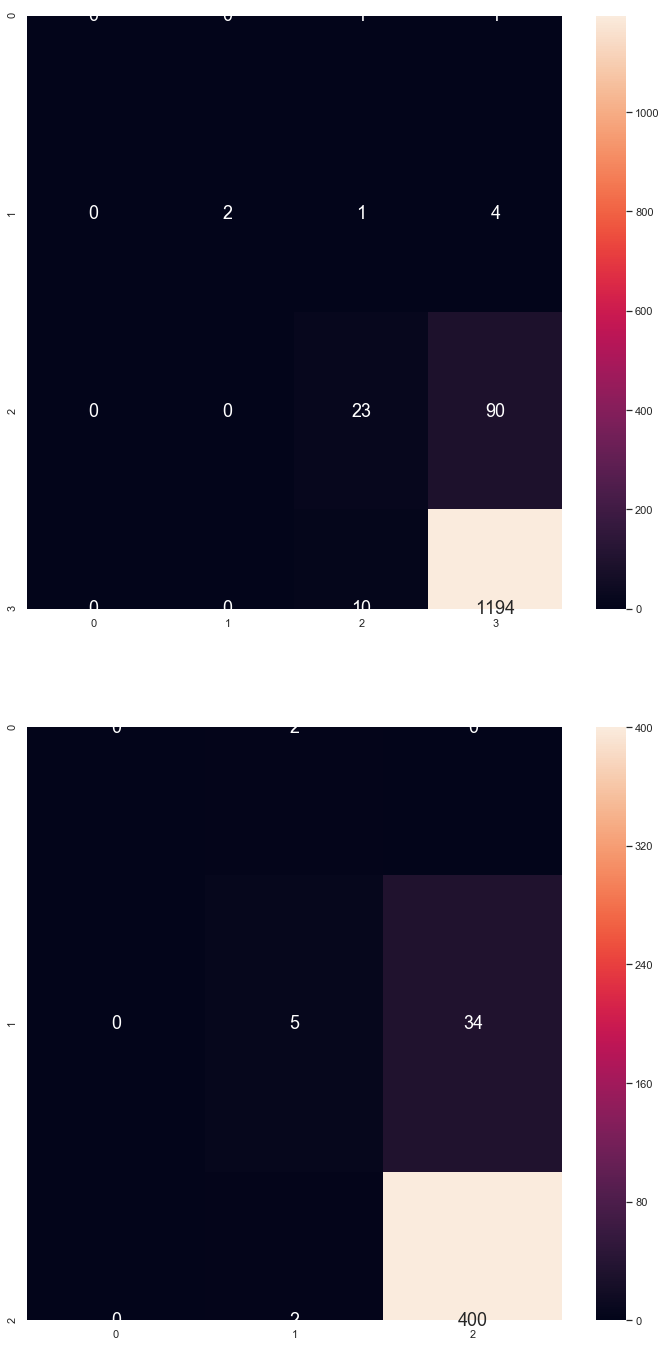

In [116]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Logistic Regression

#### With review_scores_rating

In [117]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=1000)
logmodel.fit(X_train, y_train)

C:\Users\Super User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
#predictions
Predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           7       0.00      0.00      0.00         2
           8       0.58      0.18      0.27        39
           9       0.93      0.99      0.96       402

    accuracy                           0.92       443
   macro avg       0.50      0.39      0.41       443
weighted avg       0.89      0.92      0.89       443



C:\Users\Super User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Predictions)
cnf_matrix

array([[  0,   2,   0],
       [  0,   7,  32],
       [  0,   3, 399]], dtype=int64)

### Anomaly Detection